# NVIDIA Corporation Stock Data

A `stock` (also known as equity) is a security that represents the ownership of a fraction of a corporation. This entitles the owner of the stock to a proportion of the corporation's assets and profits equal to how much stock they own. Units of stock are called `shares`

The `stock ticker` is a report of the price of a certain stock, updated continuously throughout the trading session by the various stock market exchanges

Using `yfinance` library to extract `NVIDIA` Stock Data from `Yahoo Finance`

# 0. Business Understanding

Nvidia Corporation is an American multinational corporation and technology company headquartered in Santa Clara, California, and incorporated in Delaware. 

### Set up

In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Basic Function

In [4]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [5]:
def search_table_index(tb_list, tb_name):
    index = 0
    for table in tb_list:
        for row in table.find_all('tr'):
            for data_cell in row.find_all(['th', 'td']):
                if tb_name in data_cell.text:
                    return index
        index +=1

## 1. Loading Data
- Load stock data of NVIDIA on YahooFinace using `yfinace` library and `Ticker` object.
- Scrape NVIDIA's quarterly revenue from `macrotrends.com` pagesource

In [6]:
# Using 'Ticker' function to create a ticker object

NVDA = yf.Ticker('NVDA')

In [7]:
# Load data into DataFrame

# Get information for the maximum amount of time. 
NVDA_data = NVDA.history(period='max')

NVDA_data.reset_index(inplace=True)

NVDA_data.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
6472,2024-10-11 00:00:00-04:00,134.009995,135.779999,133.660004,134.800003,170209500,0.0,0.0
6473,2024-10-14 00:00:00-04:00,136.470001,139.600006,136.300003,138.070007,232347700,0.0,0.0
6474,2024-10-15 00:00:00-04:00,137.869995,138.570007,128.740005,131.600006,377831000,0.0,0.0
6475,2024-10-16 00:00:00-04:00,133.979996,136.619995,131.580002,135.720001,264879700,0.0,0.0
6476,2024-10-17 00:00:00-04:00,139.350006,140.889999,136.869995,136.929993,302722767,0.0,0.0


In [8]:
# Page source of NVIDIA Revenue 2010-2024 on Macrotrends.net

with open('nvidia_pagesource.txt') as page_soruce:
    nvda_soup = BeautifulSoup(page_soruce.read(), 'html.parser')

In [15]:
# Extract Quarterly Revenue of NVIDIA

nvda_table = nvda_soup.find_all('table')
search_table_name = 'NVIDIA Quarterly Revenue'
index = search_table_index(nvda_table, search_table_name)

nvda_revenue_table = nvda_table[index]

nvda_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

for row in nvda_revenue_table.find('tbody').find_all('tr'):
    col = row.find_all('td')
    date = pd.to_datetime(col[0].text)
    revenue = col[1].text
    temp_dict = {'Date': [date], "Revenue": [revenue]}
    temp_pf = pd.DataFrame(temp_dict)
    nvda_revenue = pd.concat([nvda_revenue, temp_pf], ignore_index=True)

nvda_revenue.head()

C:\Users\aDMIN\AppData\Local\Temp\ipykernel_5912\1427007468.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  nvda_revenue = pd.concat([nvda_revenue, temp_pf], ignore_index=True)


,Date,Revenue
0,2024-07-31,"$30,040"
1,2024-04-30,"$26,044"
2,2024-01-31,"$22,103"
3,2023-10-31,"$18,120"
4,2023-07-31,"$13,507"


## Data Wragling
- Handle Missing Values
- Correct Data Format
- Data Standardization
- Data Normalization
- Bining and Bins Visulization
- Indicator Variables

### Correct Data Format

Remove the comma and dollar sign from the `Revenue` column. 

In [17]:
nvda_revenue["Revenue"] = nvda_revenue['Revenue'].str.replace(',|\$',"", regex=True)

### Handle missing values

Remove an null or empty strings in the Revenue column.

In [19]:
nvda_revenue.dropna(inplace=True)

nvda_revenue = nvda_revenue[nvda_revenue['Revenue'] != ""]

## 3. Data Visualization

In [20]:
make_graph(NVDA_data, nvda_revenue, "NVIDIA Stock Graph")

## 4. Data Analysis

In [21]:
NVDA_data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,6473.000000,6473.000000,6473.000000,6473.000000,6.473000e+03,6473.000000,6473.000000
mean,7.077409,7.211020,6.934697,7.079862,6.038653e+08,0.000027,0.003321
std,18.929557,19.295298,18.520822,18.928104,4.313759e+08,0.000338,0.141824
min,0.032005,0.032602,0.030571,0.031289,1.968000e+07,0.000000,0.000000
25%,0.255798,0.262992,0.248872,0.255560,3.435480e+08,0.000000,0.000000
50%,0.431748,0.438596,0.424181,0.431518,5.049170e+08,0.000000,0.000000
75%,4.297324,4.361201,4.247092,4.296353,7.348860e+08,0.000000,0.000000
max,139.788047,140.747956,133.660004,135.568405,9.230856e+09,0.010000,10.000000


## 4. Regression Analysis

In [28]:
X = NVDA_data[['Open', 'High', 'Low', 'Volume']]
y = NVDA_data['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression().fit(X_train, y_train)
predictions = model.predict(X_test)

<class 'numpy.ndarray'>


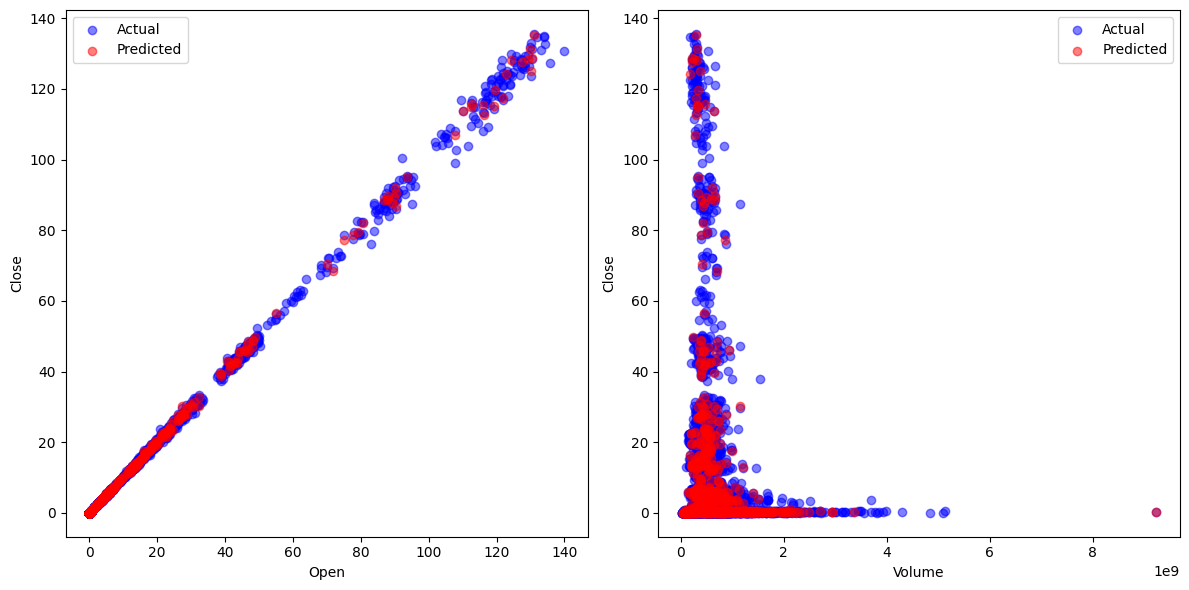

In [35]:
 # Plot predictions against feature1  
plt.figure(figsize=(12, 6))  

plt.subplot(1, 2, 1)  
plt.scatter(X['Open'], y, color='blue', alpha=0.5, label='Actual')  
plt.scatter(X_test['Open'], predictions, color='red', alpha=0.5, label='Predicted')  
plt.xlabel('Open')  
plt.ylabel('Close')  
plt.legend()  

# Plot predictions against feature2  
plt.subplot(1, 2, 2)  
plt.scatter(X['Volume'], y, color='blue', alpha=0.5, label='Actual')  
plt.scatter(X_test['Volume'], predictions, color='red', alpha=0.5, label='Predicted')  
plt.xlabel('Volume')  
plt.ylabel('Close')  
plt.legend()  

plt.tight_layout()  
plt.show()  